In [1]:
import numpy as np
import matplotlib.pyplot as plt

coonstruct our test data 

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [5]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

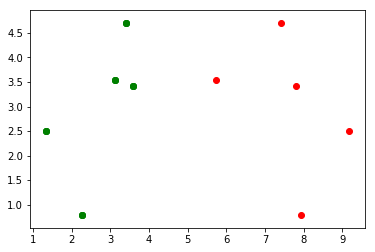

In [8]:
plt.scatter(X_train[y_train==0,0],X_train[y_train ==1,1],color = 'g')
plt.scatter(X_train[y_train ==1,0],X_train[y_train ==1,1],color = 'r')
plt.show()

In [9]:
[y_train==0,0]

[array([ True,  True,  True,  True,  True, False, False, False, False, False], dtype=bool),
 0]

In [12]:
X_train[y_train==0,0]

array([ 3.39353321,  3.11007348,  1.34380883,  3.58229404,  2.28036244])

In [16]:
y =[y_train ==1,1]

In [19]:
X_train[y_train==1,1]

array([ 4.69652288,  3.5339898 ,  2.51110105,  3.42408894,  0.79163723])

In [21]:
m = [X_train[y_train==0,0],X_train[y_train==1,1]]

In [22]:
m

[array([ 3.39353321,  3.11007348,  1.34380883,  3.58229404,  2.28036244]),
 array([ 4.69652288,  3.5339898 ,  2.51110105,  3.42408894,  0.79163723])]

In [24]:
X_train.shape

(10, 2)

In [25]:
y_train==1,0

(array([False, False, False, False, False,  True,  True,  True,  True,  True], dtype=bool),
 0)

In [26]:
X_train[y_train ==1,0]

array([ 7.42343694,  5.745052  ,  9.17216862,  7.79278348,  7.93982082])

In [27]:
x = np.array([8.093607318, 3.365731514])

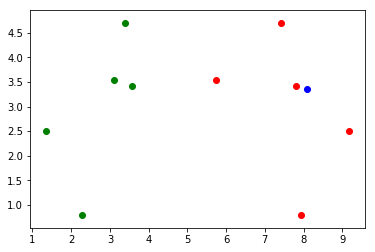

In [28]:
plt.scatter(X_train[y_train==0,0],X_train[y_train ==1,1],color = 'g')
plt.scatter(X_train[y_train ==1,0],X_train[y_train ==1,1],color = 'r')
plt.scatter(x[0],x[1],color ='b')
plt.show()

## KNN process

In [32]:
from math import sqrt
dist = []
for x_train in X_train:
    d = sqrt(np.sum((x_train -x)**2))
    dist.append(d)

In [33]:
dist

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [34]:
dist = [sqrt(np.sum((x_train-x)**2)) for x_train in X_train]

In [35]:
dist

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [36]:
np.argsort(dist)# return index after sorted

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [37]:
nearest = np.argsort(dist)

In [38]:
k = 6

In [40]:
topK_y = [y_train[i] for i in nearest[:k]]

In [41]:
topK_y

[1, 1, 1, 1, 1, 0]

In [42]:
from collections import Counter
Counter(topK_y)

Counter({0: 1, 1: 5})

In [43]:
votes = Counter(topK_y)

In [44]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [45]:
votes.most_common(1)

[(1, 5)]

In [47]:
votes.most_common(1)[0][0]# 如上，第0个元素是一个元组，我们感兴趣的是第0个元素的类别，

1

In [50]:
%run KNN_function/KNN_classify.py

In [52]:
predict_y = KNN_classify(6,X_train,y_train,x)

In [53]:
predict_y

1

## use KNN in scikit-learn 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 6)

In [57]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [58]:
KNN_classifier.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.09360732  3.36573151].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
X_predict = x.reshape(1,-1)

In [60]:
X_predict

array([[ 8.09360732,  3.36573151]])

In [61]:
KNN_classifier.predict(X_predict)

array([1])

In [62]:
y_predict = KNN_classifier.predict(X_predict)

In [63]:
y_predict

array([1])

## use ourself code  encapsulation like scikit-learn

In [69]:
%run KNN.py

In [70]:
knn_classify = KNN_classifier(3)

In [71]:
knn_classify.fit(X_train,y_train)

KNN(k = 3)

In [78]:
y_predict = knn_classify.predict(X_predict)

NameError: name 'X_train' is not defined

In [79]:
y_predict

array([1])

In [81]:
y_predict[0]

1

##  test our KNN Algorithm using iris data in scikit-learn

In [82]:
from sklearn import datasets

In [83]:
iris = datasets.load_iris()

In [85]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [86]:
X = iris.data

In [87]:
y = iris.target

In [88]:
X.shape

(150, 4)

In [89]:
y.shape

(150,)

### train_test_split  
part ot the data for trainning,another for test

In [90]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

we can see the data albels are sorted,so we should shuffle the turn

In [91]:
shuffled_indexes = np.random.permutation(len(X))
shuffled_indexes

array([128, 146,  68, 141,  74,  84, 148,  45,  96, 144,  28,  57, 102,
        16, 132,  92,  33, 134,  95,  26,  71, 143,  27, 118,  76,  21,
        75,  34,  54,  89, 110,  17,  73,  32, 100, 105,  81,   0,  51,
        14,  37,   1,  72, 109,  47, 103,  97,  52, 129,  61, 142, 140,
         4, 113,  98, 117,  20,   2,  86, 147,  69,  90, 116,  64, 145,
        53,  23,  56, 107,  70,  49, 115, 139,  41,  39, 106, 135,  63,
       123,  36,   5, 114,  10,   6,  82,  91,  62, 108, 137,  44,  83,
        30,  46,  24,  35,  93,  77,  67,  42,  43,  80,  66, 149, 125,
        79,   3,  65,  50,   8,  13,  11,  38,  85, 130,  15,  55,  59,
       121, 136,  29, 104, 138,  25, 112,  78, 111,  58,  87,  60, 101,
        18, 131, 120, 124,  40, 119,  22,  12,  48,  94, 126,  99,  88,
       127,  19, 122, 133,   9,   7,  31])

In [92]:
test_ration = 0.2
test_size = int(len(X) * test_ration)

In [93]:
train_indexes = shuffled_indexes[test_size:]
test_indexes = shuffled_indexes[:test_size]

In [94]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [95]:
print(X_test.shape)
print(X_train.shape)

(30, 4)
(120, 4)


### test our own train_test_split

In [100]:
from train_test_split import train_test_split

In [103]:
X_train,X_test,y_rtain,y_test = train_test_split(X,y)

NameError: name 'ration' is not defined

.. the code should be OK,this error just because the variable "ratio" written "ration" at first,I corrected ,but the error message not changed  
I do not want to restart the kernel

### test our own KNN 

In [104]:
from KNN import KNN_classifier

In [109]:
my_knn_clf = KNN_classifier(k =3)
my_knn_clf.fit(X_train,y_train)
y_predict_iris = my_knn_clf.predict(X_test)

NameError: name 'np' is not defined

the same error like above

In [110]:
y_predict_iris

NameError: name 'y_predict_iris' is not defined

another problem : X_train,y_train were renamed ,I should split the two datasets into two notebook files,the data we constructed and  
the iris datasets